In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings


warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
useducation_c = useducation.copy()

In [5]:
#change all the wrong state to real one
useducation_c['STATE'].replace(to_replace =['COMMONWEALTH_OF_MARIANAS', 'MARIANAS',  'NORTHERN_MARIANAS' ,  'NORTHERN_MARIANA_ISLANDS',  'MP'], value ='Northern Mariana Island', inplace=True) 
useducation_c['STATE'].replace(to_replace =['VIRGIN_ISLANDS',  'U.S._VIRGIN_ISLANDS' , 'VI'], value ='U.S. Virgin Island', inplace = True)
useducation_c['STATE'].replace(to_replace =['PR'], value ='PUERTO_RICO', inplace = True)
useducation_c['STATE'].replace(to_replace =['GU'], value ='GUAM', inplace = True)
useducation_c['STATE'].replace(to_replace =['AS'], value ='AMERICAN_SAMOA', inplace=True)
useducation_c['STATE'].replace(to_replace =['BUREAU_OF_INDIAN_AFFAIRS',  'BI',  'BIE',  'BUREAU_OF_INDIAN_EDUCATIO',  'BUREAU_OF_INDIAN_EDUCATION'], value ='DISTRICT_OF_COLUMBIA', inplace=True)
useducation_c['STATE'].replace(to_replace =['DOD_-_OVERSEAS',  'DOD_-_DOMESTIC',  'DOD','DOD_OVERSEAS', 'DOD_DOMESTIC','DD','DEPARTMENT_OF_DEFENSE','DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)' ,  'DOD_-_FOREIGN'], value ='VIRGINIA', inplace=True)

useducation_c['STATE'].unique()


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'AMERICAN_SAMOA', 'GUAM',
       'Northern Mariana Island', 'PUERTO_RICO', 'U.S. Virgin Island'],
      dtype=object)

In [6]:
useducation_c.replace(to_replace =['n/a', 'na', 'nan','NaN','NA', '--','...', 'inf'], value =np.nan, inplace = True)

In [7]:
useducation_c.columns = [x.capitalize() for x in useducation_c.columns]
useducation_c.State = [x.capitalize() for x in useducation_c.State]

In [8]:
use_c=useducation_c.groupby("State")

In [9]:
used_c = use_c.apply(lambda x: x.fillna(x.interpolate(method = 'linear', axis = 0, limit_direction = 'both')))
used_c.head()

,Primary_key,State,Year,Enroll,Total_revenue,Federal_revenue,State_revenue,Local_revenue,Total_expenditure,Instruction_expenditure,...,Grades_4_g,Grades_8_g,Grades_12_g,Grades_1_8_g,Grades_9_12_g,Grades_all_g,Avg_math_4_score,Avg_math_8_score,Avg_reading_4_score,Avg_reading_8_score
0,1992_ALABAMA,Alabama,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,260.276441
1,1992_ALASKA,Alaska,1992,121156.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,223.833455,277.643071,211.547154,258.859712
2,1992_ARIZONA,Arizona,1992,676297.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,Arkansas,1992,311432.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,California,1992,5129788.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,269.197451


In [10]:
used_c.dropna(inplace=True)

In [11]:
used_c['Total_revenue'].unique()

array([ 2678885.,  1049591.,  3258079., ..., 13448045.,  1788749.,
       23766529.])

### Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

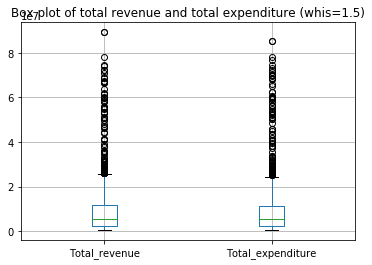

In [12]:
used_c.boxplot(column = ['Total_revenue', 'Total_expenditure'])
plt.title("Box plot of total revenue and total expenditure (whis=1.5)")
plt.show()

Lots of outliers


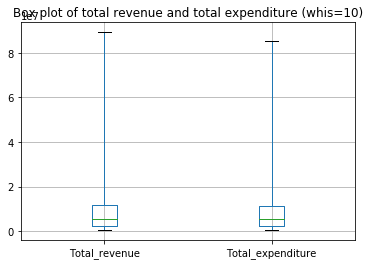

In [13]:
used_c.boxplot(column = ['Total_revenue', 'Total_expenditure'], whis = 10)
plt.title("Box plot of total revenue and total expenditure (whis=10)")
plt.show()

because of the high threshold limit, outliers now is lower/zero

Histogram is another useful chart to se outliers

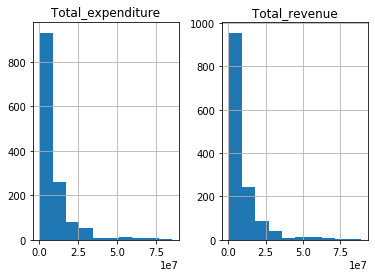

In [14]:
used_c.hist(column = ['Total_revenue', 'Total_expenditure'])

plt.show()

Here, right hand ranges are all outliers.

Next, formal statistical methods to detect outliers.



### Z-score:

In [15]:
used_c['Total_revenue'].dtype

dtype('float64')

In [16]:
used_c['Total_revenue'].astype(int).head()

0     2678885
1     1049591
2     3258079
3     1711959
4    26260025
Name: Total_revenue, dtype: int64

In [17]:
from scipy.stats import zscore
from scipy import stats

z_scores = zscore(used_c['Total_revenue'])
for threshold in range(0,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 0
The indices of the outliers:
(array([   4,    9,   13,   22,   30,   32,   39,   44,   56,   61,   65,
         75,   85,   88,   91,   96,  108,  114,  118,  127,  137,  140,
        143,  148,  150,  161,  166,  170,  179,  187,  190,  193,  196,
        201,  213,  218,  222,  231,  239,  241,  244,  247,  252,  264,
        269,  273,  282,  290,  292,  295,  299,  304,  316,  321,  325,
        334,  342,  344,  347,  350,  355,  367,  373,  374,  377,  386,
        394,  396,  399,  402,  407,  420,  425,  426,  429,  437,  438,
        445,  447,  449,  452,  455,  460,  472,  477,  478,  481,  482,
        490,  491,  499,  501,  502,  504,  507,  512,  515,  524,  529,
        530,  533,  541,  542,  550,  552,  553,  555,  559,  564,  567,
        576,  581,  582,  585,  594,  595,  603,  605,  606,  608,  611,
        616,  619,  628,  633,  634,  637,  638,  645,  646,  654,  656,
        657,  659,  662,  665,  668,  671,  680,  685,  686,  689,  

In [18]:
z_scores = zscore(used_c['Total_expenditure'])
for threshold in range(0,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 0
The indices of the outliers:
(array([   4,    9,   13,   22,   30,   32,   35,   39,   44,   56,   61,
         65,   75,   85,   88,   91,   96,  108,  114,  118,  127,  137,
        140,  143,  148,  150,  161,  166,  170,  179,  187,  190,  193,
        196,  201,  213,  218,  222,  231,  239,  241,  244,  247,  252,
        264,  269,  273,  282,  290,  292,  295,  299,  304,  316,  321,
        325,  334,  342,  344,  347,  350,  355,  367,  373,  374,  377,
        386,  394,  396,  399,  402,  407,  420,  425,  426,  429,  437,
        438,  445,  447,  449,  452,  455,  460,  472,  477,  478,  481,
        482,  490,  491,  499,  501,  502,  504,  507,  512,  515,  524,
        529,  530,  533,  541,  542,  550,  552,  553,  555,  559,  564,
        567,  576,  581,  582,  585,  586,  594,  595,  603,  605,  606,
        608,  611,  616,  619,  628,  633,  634,  637,  638,  645,  646,
        654,  656,  657,  659,  662,  665,  668,  671,  680,  685,  

### Tukey's method
also known as IQR method: 1.5 times IQR as outliers


In [33]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(used_c["Total_revenue"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        (np.where((used_c["Total_revenue"] > max_val) | used_c["Total_revenue"] < min_val))))
    

The score threshold is: 1.0
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 1.5
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 2.0
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 2.5
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 3.0
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 3.5
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 4.0
Number of outliers is: (array([], dtype=int64),)
The score threshold is: 4.5
Number of outliers is: (array([], dtype=int64),)


In [31]:

q75, q25 = np.percentile(used_c['Total_expenditure'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where((used_c['Total_expenditure'] > max_val) 
                                                           | used_c['Total_expenditure'] < min_val))[0])
                                            ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


### If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [36]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_viewsR = winsorize(used_c["Total_revenue"], (0, 0.10))
winsorized_viewsE = winsorize(used_c["Total_expenditure"], (0, 0.10))

winsorized_viewsR


masked_array(data=[ 2678885.,  1049591.,  3258079., ...,  3478401.,
                   11637376.,  1962874.],
             mask=False,
       fill_value=1e+20)

In [37]:
winsorized_viewsE

masked_array(data=[ 2653798.,   972488.,  3401580., ...,  3466981.,
                   11553677.,  1942406.],
             mask=False,
       fill_value=1e+20)

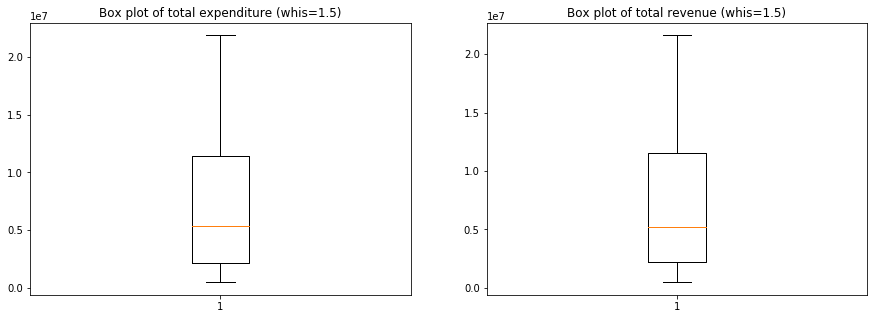

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)

plt.boxplot(winsorized_viewsE)
plt.title("Box plot of total expenditure (whis=1.5)")

plt.subplot(1,2,2)
plt.boxplot(winsorized_viewsR)
plt.title("Box plot of total revenue (whis=1.5)")
plt.show()

See no outliers after winsorization

In [45]:
z_scores = zscore(winsorized_viewsE)
for threshold in range(0,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 0
The indices of the outliers:
(array([   4,    9,   13,   22,   30,   32,   35,   39,   44,   56,   61,
         65,   75,   85,   88,   91,   96,  108,  114,  118,  127,  137,
        140,  143,  148,  150,  161,  166,  170,  179,  187,  190,  193,
        196,  201,  213,  218,  219,  222,  231,  239,  241,  244,  247,
        252,  264,  269,  270,  273,  282,  290,  292,  295,  296,  299,
        304,  316,  321,  322,  325,  333,  334,  342,  344,  347,  350,
        355,  358,  367,  373,  374,  377,  378,  385,  386,  394,  396,
        397,  399,  402,  407,  411,  414,  420,  425,  426,  429,  430,
        437,  438,  439,  445,  447,  449,  450,  452,  455,  460,  463,
        464,  466,  472,  477,  478,  481,  482,  483,  489,  490,  491,
        492,  499,  501,  502,  504,  507,  512,  515,  516,  518,  524,
        529,  530,  533,  534,  540,  541,  542,  543,  550,  552,  553,
        555,  559,  564,  567,  568,  570,  576,  581,  582,  585,  

When transforming the variable, we usually apply **monotonic transformations**. These are transformations that don't change the relative ordering of the values in a variable. **Log transformations** and **square root transformations** are 2 common monotonic transformations in data science.

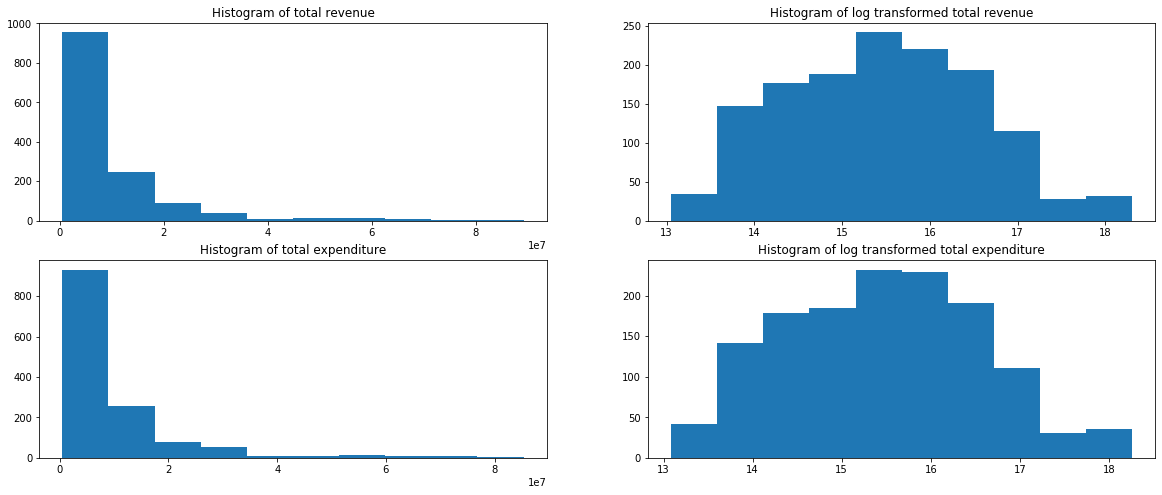

In [35]:
plt.figure(figsize = (20,8))

plt.subplot(2,2,1)
plt.hist(used_c['Total_revenue'])
plt.title("Histogram of total revenue")

plt.subplot(2,2,2)
plt.hist(np.log(used_c['Total_revenue']))
plt.title("Histogram of log transformed total revenue")

plt.subplot(2,2,3)
plt.hist(used_c['Total_expenditure'])
plt.title("Histogram of total expenditure")


plt.subplot(2,2,4)
plt.hist(np.log(used_c['Total_expenditure']))
plt.title("Histogram of log transformed total expenditure")

plt.show()

as the log transformation brings histogram more close to normal distribution

let see if boxplots got any outliers or not after log transformation

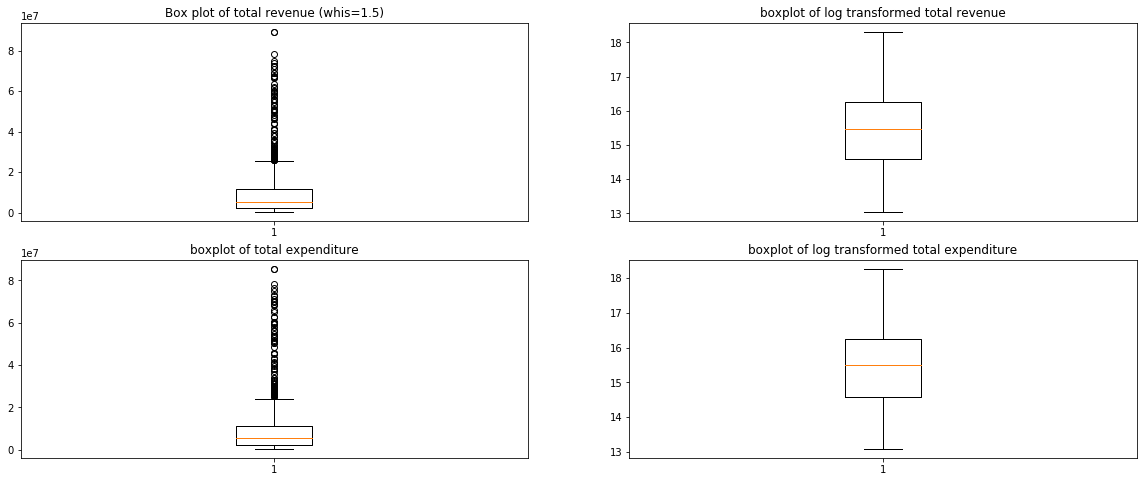

In [36]:
plt.figure(figsize = (20,8))

plt.subplot(2,2,1)
plt.boxplot(used_c['Total_revenue'])
plt.title("Box plot of total revenue (whis=1.5)")

plt.subplot(2,2,2)
plt.boxplot(np.log(used_c['Total_revenue']))
plt.title("boxplot of log transformed total revenue")

plt.subplot(2,2,3)
plt.boxplot(used_c['Total_expenditure'])
plt.title("boxplot of total expenditure")


plt.subplot(2,2,4)
plt.boxplot(np.log(used_c['Total_expenditure']))
plt.title("boxplot of log transformed total expenditure")

plt.show()

In [49]:
# now we take the log of the video views and calculate
# the quartiles accordingly.

q75, q25 = np.percentile(np.log(used_c["Total_revenue"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where((np.log(used_c["Total_revenue"]) > max_val) 
                                                           | (np.log(used_c["Total_revenue"]) < min_val))[0]))
                                            ))


The score threshold is: 1.0
Number of outliers is: 16
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


### Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

### Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

### Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

### If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?